<table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>This notebook is provided under the Creative Commons Attribution license, CC-BY 4.0. All code is made available under MIT License (c) Arash Sarshar.</td>
 <td> </td>
</table>

## Some ground rules for writing good responses in your assignments

* Make sure that you provide ample comments to communicate what you are trying to do clearly. Do not assume that anyone reading the code would immediately  understand the context.
* If you need to create new variables, think about naming them in descriptive ways.
* Each and every output should be reproducible. If you are creating a plot, make sure you include the code for that plot.
* Cite your references, including AI ones.


## Let's load the lemon picture again

In [ ]:
import numpy as np
from numpy.linalg import *
from PIL import Image
import matplotlib.pyplot as plt

PIL stands for Python Imaging Library, and it provides the necessary tools and functions for handling images in Python. It is used for image processing, manipulation, and analysis.

In [ ]:
image = np.array(Image.open('./Images/lemon.jpeg'))

## Part 1

Write a block of commands that does the following.  

1. Print the shape of the image
1. Create a new variable called `img_single_channel` that is equivalent to __the last color channel__ of `image`
3. Print the shape of `img_single_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  `img_single_channel`





(100, 100, 3)
(100, 100)


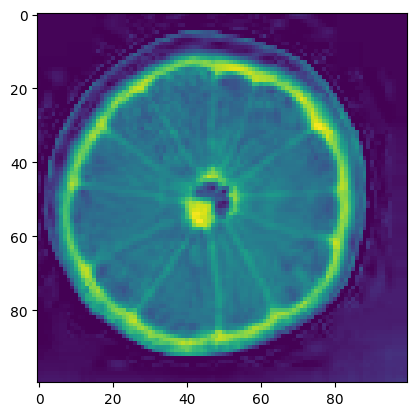

In [ ]:
#import cv2 to use OpenCV library for color extraction from a specific channel
import cv2

#prints out the deminison of the image in form a tuple
print(image.shape)

#Note: I am not sure if this is the correct way of getting the last color channel, which I assume is Blue from the RGB. Thus is why I imported cv2
#reads the image
img = cv2.imread('./Images/lemon.jpeg')

#sets new variable to last color channel, Blue
img_single_channel = img[:,:,0]

#prints out the deminisons of the new image
print(img_single_channel.shape)

#plots the new image with just one color channel
plt.imshow(img_single_channel)

## Part 2

Write a block of commands that does the following.  

1. Create a new variable called `img_average_channel` that is equivalent to __the average of all three color channels__ of `image`
3. Print the shape of `img_average_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  the original image in `image`, compare the result with the result of `Part 1`, and comment on the differences and which one you would say is better

(100, 100)


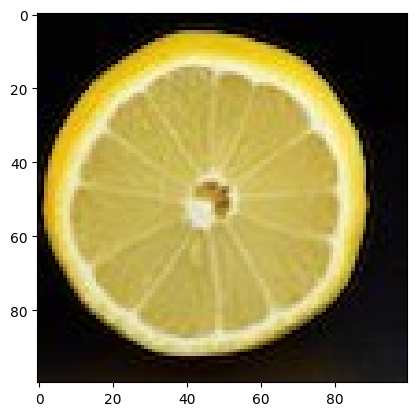

In [ ]:
#To take the average of all three color channels, we call np.mean and input the image and 0 to get the average
img_average_channel = np.mean(image,2)

 #Now print out the deminison of the average image and then plot the original image
print(img_average_channel.shape)
plt.imshow(image)

Comparing the two images, the difference from the two is that the image from Part 1 comes out as a heat map or a possible depths of the colors since we are looking only at the last color channel for the Part 1 image.

## Part 3

1. Describe what an identity matrix is. What does multiplying with an identity matrix do?
1. Create an identity matrix called `identity_matrix` that has the same size as `img_average_channel`.
2. Print a random row out of `identity_matrix` and describe your observations.

An identity matrix is a sqaure matrix that has ones (1) diagonally and rest of the elements are zeros. Multiplying an identity matrix with a matrix just results in the original matrix as the identity matrix does not change the original matrix

In [ ]:
#Using np.eye to create an identity matrix with the average number of row and columns of img_average_channel
identity_matrix = np.eye(img_average_channel.shape[0])

#Grabing a random row from identity matrix by using np.random.randint which randomize a row with index [0,99]
rand_matrix = identity_matrix[np.random.randint(0,99)]
print(rand_matrix)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


Only one value is is 1 is printed out in a random row as the rest are 0

## Part 4

We are going to use `identity_matrix` to scramble the rows and columns of `img_average_channel`.

1. First, create a numpy array that contains the numbers $0,1, \cdots, N$ where $N$ is the number of rows in the image.

2. Use `numpy.random.shuffle` to shuffle the indices. Call the shuffled array, `rows`

4. Print `rows` and inspect the elements.

In [ ]:
#Generates a list of row indices from number of rows in the original image
rows = np.arange(image.shape[0])

#Shuffles the row indices
np.random.shuffle(rows)

#Prints out the shuffled row indices
print(rows)


[73 59 63  1 79 64 99 39 34 43 87 28 77 13 67 57 86 71 29 53 78 47 89 14
 58 65 88 55 49 52  5 30 94 75 45 98 17 84 12 82 95 70 93  8 66 61 72 26
 44 92 96  0 42 41 51 19 36 83  7 27 97 10 74 25  4 15 16 21  6 35 80 60
 68 90 46 33 37 31  3 76 69 20 48 56  2 18 62 32 81 38  9 40 23 54 24 22
 85 11 91 50]


## Part 5

1. Use your array of random row indices to create a new matrix `T` from `identity_matrix`. Overall, `T` has the same elements as `identity_matrix`, but the order of the rows of `T` should be according to the variable `rows`
2. Take a moment to think about what we are doing here. Describe in your own words what matrix `T` is.
3. Sanity check, print the shape of `T` and make sure it is the same size as `identity_matrix` and `img_average_channel`. If you need to,  reshape it to have the same size.


In [ ]:
#Creates new matrix with indentity matrix of shuffled row indices
T = identity_matrix[rows]

#A sanity check to make sure shape of T is same as identity_matrix and img_average_channel
print(T.shape)


(100, 100)


## Part 6

1. Matrix multiply `T` and `img_average_channel` and store the result in `transformed_image`. Check the shape of the result.
2. Plot `transformed_image` and describe the pattern you see.
3. Think about what each dot product in the matrix multiplication is doing. Describe in your own words what this transformation is doing to the original image.

(100, 100)


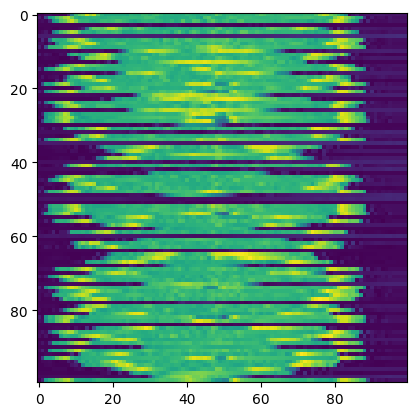

In [ ]:
#New matrix is set that is a multiple of T and img_average_channel
transformed_image = T @ img_average_channel

#Prints out the new matrix
print(transformed_image.shape)

#Plots the new matrix
plt.imshow(transformed_image)

The new image is now a scramble image of the lemon, almost as wave length but shown vertically.The colors are kept the same but now the rows are shuffled around due to using dot product on the shuffled Identity Matrix and the Average Channel matrix.  

## Part 7

1. We now want to retrieve the original image. Is matrix `T` invertible? How would you show that it is invertible?
2. Compute the inverse and store the matrix in `Tinv`.
3. Perform the inverse of the scrambling operation and plot the result to show that you retrieved the original image.

We can show that matrix T is invertible by calculating the determinant matrix of T. If the result is not equal to 0, then the matrix is invertible.

1.0


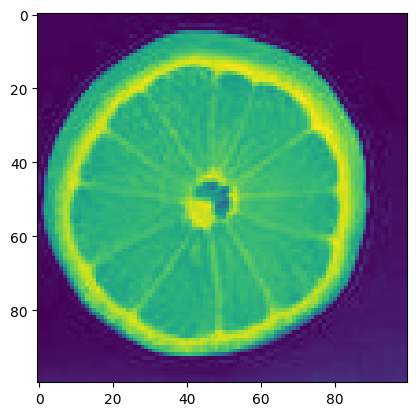

In [ ]:
#Using linalg.det to determine the determinant of Matrix T
det_T = np.linalg.det(T)

#Prints out the result of the determinant
print(det_T)

#Using linalg.inv to get the inverse of Matrix T
Tinv = np.linalg.inv(T)

#Multply the inverse of Matrix T to the tranformed image
org_image = Tinv @ transformed_image

#Plot the matrix multiplication
plt.imshow(org_image)


## Part 8: Extra Points

* We want to perform the same operations but on the columns of the original image. How would you do the matrix algebra? Plot the scrambled image for the proof of concept.


(100, 100)


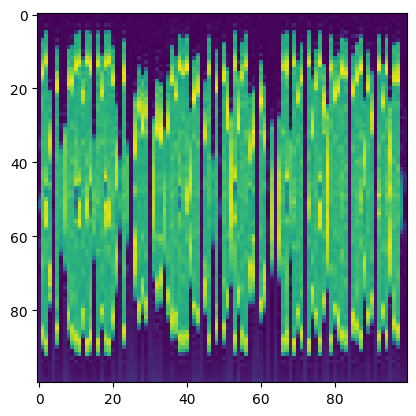

In [ ]:
#Generates a list of col indices from number of cols in the original image
cols = np.arange(image.shape[1])

#Shuffles the col indices
np.random.shuffle(cols)

#Creates new matrix with indentity matrix of shuffled col indices
col_T = identity_matrix[cols]

#New matrix is set that is a multiple of img_average_channel and col_T
#**Must switch the multiplication to have it horizontally
transformed_image = img_average_channel @ col_T

#Prints out the new matrix
print(transformed_image.shape)

#Plots the new matrix
plt.imshow(transformed_image)

## Extra Points

* Now can you perform the scrambling on __both the columns and rows__ of the original image?  Write the code and plot the scrambled image. Then invert the operations and show that you can recover the original image.